In [50]:
from FIG import FIG
from PHATET import PHATET

In [21]:
from scipy import io
import pandas as pd
import numpy as np
# Load EEG data
data = io.loadmat(r'n10_8-12hz.mat')
# labels_d = io.loadmat(r'C:\Users\Andres Duque\Documents\Research2\labelsn10.mat')
# labels = labels_d['hyp']
eeg = np.transpose(data['data'])
# labels  = np.reshape(labels, 860)

# select some channels
Data_eeg = eeg[:,:]

labels_d = pd.read_excel('labelsn10.xlsx')
labels = np.array(labels_d['Unnamed: 7'])
labels  = np.reshape(labels[:860], 860)

print(Data_eeg.shape)

time_lab = np.arange(860)

(3302400, 18)


In [23]:
# Example usage
if __name__ == "__main__":
    # Sample data
    # time windows to process the data
    L1 = 3840 # window size to process the features
    L3 = 3840 # distance between the centers of the windows
    win_size = 50 # window size to compute the the joint covariance matrix
    # Create and initialize FIG class with the dataset
    fig_model = FIG(X = Data_eeg, L = win_size, n_components=3, normalization='exp', num_basis=7, basis_type="Fourier", period=50, L1=L1, L3=L3)


/var/folders/9d/jwh_v6ts4hx1hx163lslc44c0000gn/T/ipykernel_23976/3624522021.py:130: ComplexWarning: Casting complex values to real discards the imaginary part
  EigVal[i, :] = eigvals[:self.n_components]
/var/folders/9d/jwh_v6ts4hx1hx163lslc44c0000gn/T/ipykernel_23976/3624522021.py:131: ComplexWarning: Casting complex values to real discards the imaginary part
  EigVec[i, :, :] = eigvecs[:, :self.n_components].T


In [35]:
def obtain_embs():
    fig_model = FIG(X = Data_eeg, 
                    L = win_size, 
                    n_components=3, 
                    normalization='exp', 
                    num_basis=7, 
                    basis_type="Fourier", 
                    period=50, 
                    L1=L1, L3=L3)
    phate_emb = PHATET(knn_dist = 'precomputed_distance', k = 20, n_components = 10)
    phate_emb_3d = PHATET(n_components = 3, k = 20)
    phate_emb_2d = PHATET(n_components = 2, k = 20)
    # first we reduce the dimension to 10
    fig = phate_emb.fit_transform(fig_model.MD)
    
    # and then we apply PHATE to the reduced data to obtain visualizations in either 2D or 3D
    fig_3d = phate_emb_3d.fit_transform(fig)
    fig_2d = phate_emb_2d.fit_transform(fig)
    return fig_2d, fig_3d
    

In [38]:
# run with different window sizes (L2)
win_sizes = [10, 20, 50, 100]
fig_2d_ = []
for i in range(len(win_sizes)):
    win_size = win_sizes[i]
    fig_2d, _ = obtain_embs()
    fig_2d_.append(fig_2d)


/var/folders/9d/jwh_v6ts4hx1hx163lslc44c0000gn/T/ipykernel_23976/3624522021.py:130: ComplexWarning: Casting complex values to real discards the imaginary part
  EigVal[i, :] = eigvals[:self.n_components]
/var/folders/9d/jwh_v6ts4hx1hx163lslc44c0000gn/T/ipykernel_23976/3624522021.py:131: ComplexWarning: Casting complex values to real discards the imaginary part
  EigVec[i, :, :] = eigvecs[:, :self.n_components].T


Calculating PHATE...
  Using precomputed distance matrix...
  Calculating graph and diffusion operator...
Calculating affinities...
Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.03 seconds.
  Calculating optimal t...
  Calculated optimal t in 0.43 seconds.
  Automatically selected t = 28
  Calculating diffusion potential...
  Calculated diffusion potential in 0.43 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 8.55 seconds.
Calculated PHATE in 9.45 seconds.
Calculating PHATE...
  Calculating graph and diffusion operator...
Calculating KNN search...
Calculated KNN search in 0.03 seconds.
Calculating affinities...
Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.06 seconds.
  Calculating optimal t...
  Calculated optimal t in 0.46 seconds.
  Automatically selected t = 40
  Calculating diffusion potential...
  Calculated diffusion potential in 0.34 seconds.
  Calculating metric MDS...
  Calculate

/var/folders/9d/jwh_v6ts4hx1hx163lslc44c0000gn/T/ipykernel_23976/3624522021.py:130: ComplexWarning: Casting complex values to real discards the imaginary part
  EigVal[i, :] = eigvals[:self.n_components]
/var/folders/9d/jwh_v6ts4hx1hx163lslc44c0000gn/T/ipykernel_23976/3624522021.py:131: ComplexWarning: Casting complex values to real discards the imaginary part
  EigVec[i, :, :] = eigvecs[:, :self.n_components].T


Calculating PHATE...
  Using precomputed distance matrix...
  Calculating graph and diffusion operator...
Calculating affinities...
Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.02 seconds.
  Calculating optimal t...
  Calculated optimal t in 0.31 seconds.
  Automatically selected t = 31
  Calculating diffusion potential...
  Calculated diffusion potential in 0.36 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 8.69 seconds.
Calculated PHATE in 9.41 seconds.
Calculating PHATE...
  Calculating graph and diffusion operator...
Calculating KNN search...
Calculated KNN search in 0.02 seconds.
Calculating affinities...
Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.05 seconds.
  Calculating optimal t...
  Calculated optimal t in 0.62 seconds.
  Automatically selected t = 40
  Calculating diffusion potential...
  Calculated diffusion potential in 0.35 seconds.
  Calculating metric MDS...
  Calculate

/var/folders/9d/jwh_v6ts4hx1hx163lslc44c0000gn/T/ipykernel_23976/3624522021.py:130: ComplexWarning: Casting complex values to real discards the imaginary part
  EigVal[i, :] = eigvals[:self.n_components]
/var/folders/9d/jwh_v6ts4hx1hx163lslc44c0000gn/T/ipykernel_23976/3624522021.py:131: ComplexWarning: Casting complex values to real discards the imaginary part
  EigVec[i, :, :] = eigvecs[:, :self.n_components].T


Calculating PHATE...
  Using precomputed distance matrix...
  Calculating graph and diffusion operator...
Calculating affinities...
Calculated affinities in 0.06 seconds.
  Calculated graph and diffusion operator in 0.09 seconds.
  Calculating optimal t...
  Calculated optimal t in 0.34 seconds.
  Automatically selected t = 32
  Calculating diffusion potential...
  Calculated diffusion potential in 0.31 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 9.68 seconds.
Calculated PHATE in 10.46 seconds.
Calculating PHATE...
  Calculating graph and diffusion operator...
Calculating KNN search...
Calculated KNN search in 0.02 seconds.
Calculating affinities...
Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.04 seconds.
  Calculating optimal t...
  Calculated optimal t in 0.52 seconds.
  Automatically selected t = 40
  Calculating diffusion potential...
  Calculated diffusion potential in 0.33 seconds.
  Calculating metric MDS...
  Calculat

/var/folders/9d/jwh_v6ts4hx1hx163lslc44c0000gn/T/ipykernel_23976/3624522021.py:130: ComplexWarning: Casting complex values to real discards the imaginary part
  EigVal[i, :] = eigvals[:self.n_components]
/var/folders/9d/jwh_v6ts4hx1hx163lslc44c0000gn/T/ipykernel_23976/3624522021.py:131: ComplexWarning: Casting complex values to real discards the imaginary part
  EigVec[i, :, :] = eigvecs[:, :self.n_components].T


Calculating PHATE...
  Using precomputed distance matrix...
  Calculating graph and diffusion operator...
Calculating affinities...
Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 0.02 seconds.
  Calculating optimal t...
  Calculated optimal t in 0.29 seconds.
  Automatically selected t = 32
  Calculating diffusion potential...
  Calculated diffusion potential in 0.35 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 14.19 seconds.
Calculated PHATE in 14.87 seconds.
Calculating PHATE...
  Calculating graph and diffusion operator...
Calculating KNN search...
Calculated KNN search in 0.02 seconds.
Calculating affinities...
  Calculated graph and diffusion operator in 0.03 seconds.
  Calculating optimal t...
  Calculated optimal t in 0.65 seconds.
  Automatically selected t = 41
  Calculating diffusion potential...
  Calculated diffusion potential in 0.36 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 8.49 seconds.
Calcula

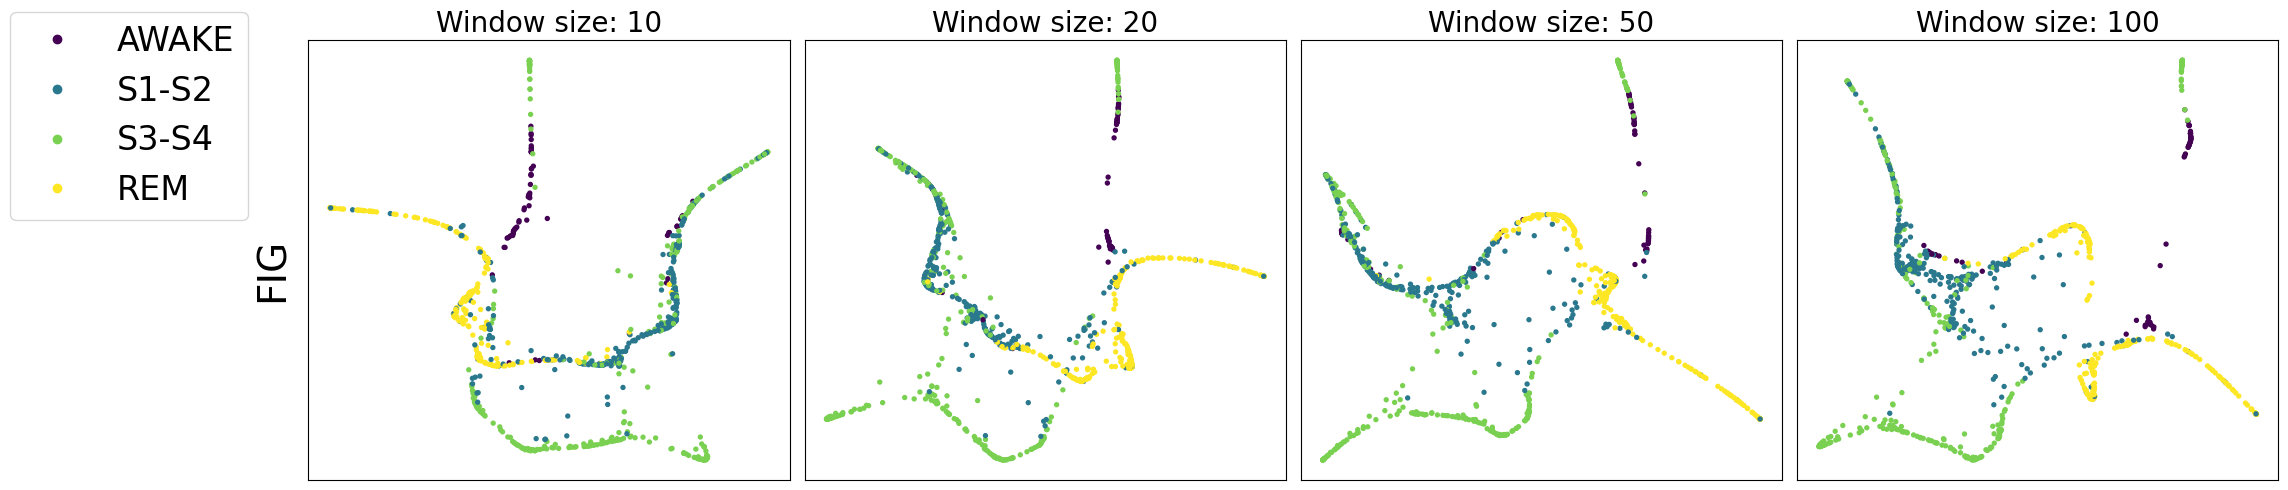

In [49]:
from matplotlib import pyplot as plt

# Define legend dictionary
legend_dict = {
    0: 'AWAKE',
    2: 'S1-S2',
    4: 'S3-S4',
    5: 'REM'
}
# this just created for legend
scatterplot = plt.scatter(fig_2d_[0][:, 0], fig_2d_[0][:, 1],c=labels, s=8)
plt.close()


# Create subplots for dig_2d
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Create subplots for fig_2d
for i, matrix in enumerate(fig_2d_):
    ax = axes[i]
    ax.scatter(matrix[:, 0], matrix[:, 1], c=labels, s=8)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'Window size: {win_sizes[i]}', fontsize=20)  # Optional: Adding subplot titles

fig.text(-0.02, 0.45, 'FIG', va='center', rotation='vertical', fontsize=28)
            
# Create legend manually
legend_labels = [legend_dict[label] for label in np.unique(labels)]
fig.legend(labels=legend_labels, loc='upper left', handles = scatterplot.legend_elements()[0], fontsize = 24, bbox_to_anchor=(-0.15, 1))

# 
# Add title
# plt.suptitle("Embeddings of FIG (2D)", fontsize = 20)
# elimiate the axis labels 
# window size just up to 100

# Adjust layout
plt.tight_layout()
plt.show()